In [1]:
# File: linear_regression_one_varialbe
# Name: Joanne
# ----------------------------
# This file shows the fundamental concepts of 
# machine learing:
#   - loss function
#   - cost function
#   - linear regression
#.  - polynomial features
#   - training process

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# This function computes the L2 loss which is 
# ----------------------------------------
# [sum of (hypothesis(x_i) - y_i)^2] / (2*m)
# where hypothesis(x_i) == theta1(x_i^3) + theta2(x_i^2) + theta3(x_i) + b
# ----------------------------------------
# theta1: float, the parameter of x_i^3
# theta2: float, the parameter of x_i^2
# theta3: float, the parameter of x_i
# b     : float, the parameter that controls the amount of line shift
# x     : list, containing 21 data points
# y     : list, containing 21 data points
# return: float, the sum over all L2 losses of data points

def cost_function(theta1, theta2, theta3, b, x, y):
    return sum((theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])**2 for i in range(len(x)))/(2*len(x))
        

In [4]:
# Test for cost_function. You should see 0.14631688333333334
print(cost_function(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

0.14631688333333334


In [5]:
def dJ_dtheta1(theta1, theta2, theta3, b, x, y):
    return sum((theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])*x[i]**3 for i in range(len(x)))/len(x)

In [6]:
# Test for dJ_dtheta1. You should see -0.040437
print(dJ_dtheta1(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.040437


In [7]:
def dJ_dtheta2(theta1, theta2, theta3, b, x, y):
    return sum((theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])*x[i]**2 for i in range(len(x)))/len(x)

In [8]:
# Test for dJ_dtheta2. You should see -0.09252266666666666
print(dJ_dtheta2(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.09252266666666666


In [9]:
def dJ_dtheta3(theta1, theta2, theta3, b, x, y):
    return sum((theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])*x[i] for i in range(len(x)))/len(x)

In [10]:
# Test for dJ_dtheta3. You should see -0.21906
print(dJ_dtheta3(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.21906


In [11]:
def dJ_db(theta1, theta2, theta3, b, x, y):
    return sum(theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i] for i in range(len(x)))/len(x)

In [12]:
# Test for dJ_db. You should see -0.5394666666666666
print(dJ_db(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.5394666666666666


In [13]:
# ---------- DO NOT EDIT THE CODE BELOW THIS LINE ---------- #

In [14]:
x = [6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,5.7107,10.164,5.734,8.4084,5.6407,5.3794,6.3654,5.1301,6.4296,7.0708,6.1891]

In [15]:
y = [6.592,9.1302,13.662,11.854,6.8233,11.886,4.3483,12,6.5987,3.8166,3.2522,15.505,3.1551,7.2258,0.71618,3.5129,5.3048,0.56077,3.6518,5.3893,3.1386]

In [16]:
# ---------- Showing your data ---------- #

(0.0, 30.0)

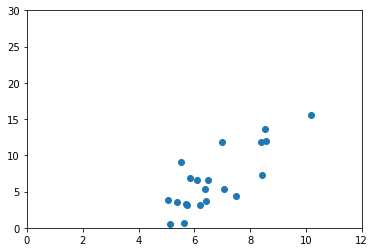

In [17]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,30])

In [18]:
# Please perform feature scaling (normalization) by: 
# subtracting min(x) from each data point and dividing the result with (max(x)-min(x))
x = list((x[i]-min(x))/(max(x)-min(x)) for i in range(len(x)))
y = list((y[i]-min(y))/(max(y)-min(y)) for i in range(len(y)))

In [19]:
print(x[10])         # You should see 0.12841038086663803
print(y[10])         # You should see 0.18009827204211928

0.12841038086663803
0.18009827204211928


(0.0, 2.0)

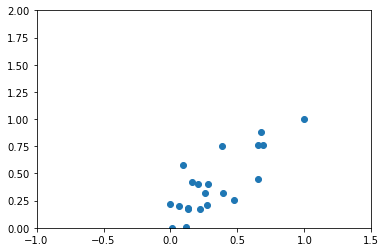

In [20]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([-1,1.5])
axes.set_ylim([0,2])

In [21]:
# ------------ Initialize your theta ------------ #
# -----------  Choose from -1 to +1 ------------ #

In [22]:
theta1 = 0.1
theta2 = 0.1
theta3 = 0.6
b = 0.15


In [23]:
# ---------- Initialize your alpha ---------- #

In [24]:
# TODO: which value is appropriate for alpha?
# Try 0.001, 0.01, 0.1

In [25]:
alpha = 0.1

In [26]:
# ---------- Training process ---------- #
# ---- 50 iterations over all data ----- # 

In [27]:
# Remember to append updated theta1, theta2, theta3, b, and cost.

theta1_history = []
theta2_history = []
theta3_history = []
b_history = []
cost_history = []
for i in range(50):
    theta1_history.append(theta1)
    theta2_history.append(theta2)
    theta3_history.append(theta3)
    b_history.append(b)
    
    cost = cost_function(theta1, theta2, theta3, b, x, y)
    cost_history.append(cost)
    
    #G.D
    theta1 = theta1 - alpha * dJ_dtheta1(theta1, theta2, theta3, b, x, y)
    theta2 = theta2 - alpha * dJ_dtheta2(theta1, theta2, theta3, b, x, y)
    theta3 = theta3 - alpha * dJ_dtheta3(theta1, theta2, theta3, b, x, y)
    b = b - alpha * dJ_db(theta1, theta2, theta3, b, x, y)


In [28]:
# ---------- Cost changes during training process ---------- #

In [29]:
# Pay attention to the trend of cost. 
# Is it rising? If it is, why?

print(cost_history)

[0.014249936182932002, 0.014151768504442728, 0.014074268709938267, 0.014012960365528007, 0.013964341149846552, 0.013925670647394198, 0.01389480438926639, 0.013870064060194304, 0.013850135988571932, 0.01383399175473758, 0.013820826096681074, 0.013810008343256939, 0.013801044426779083, 0.013793547169507033, 0.013787213041069609, 0.013781803976853338, 0.013777133154694934, 0.013773053867537851, 0.01376945081764648, 0.01376623330493953, 0.013763329896937147, 0.013760684257698002, 0.013758251883414077, 0.013755997547302747, 0.013753893299427373, 0.013751916900700708, 0.013750050596621242, 0.0137482801568598, 0.013746594122898673, 0.013744983218507586, 0.013743439887680934, 0.013741957932358571, 0.0137405322282732, 0.013739158501977404, 0.01373783315578804, 0.013736553130267953, 0.01373531579612037, 0.013734118869135614, 0.013732960343210535, 0.013731838437541293, 0.01373075155493574, 0.013729698248853218, 0.013728677197297715, 0.013727687182095615, 0.013726727072406882, 0.013725795811566997

In [30]:
# ---------------------------- Please do not modify codes below this line ---------------------------- #

theta1: 0.1, theta2: 0.1, theta3: 0.6, b: 0.15


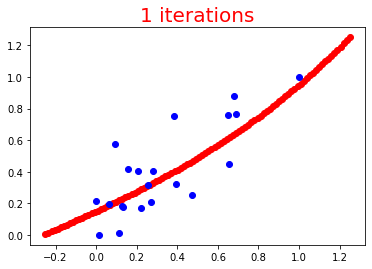

In [31]:
theta1 = theta1_history[0]
theta2 = theta2_history[0]
theta3 = theta3_history[0]
b = b_history[0]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("1 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.10483274951833914, theta2: 0.1063489756181895, theta3: 0.6090094491902018, b: 0.16448916038918723


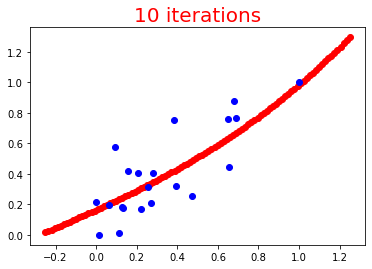

In [32]:
theta1 = theta1_history[9]
theta2 = theta2_history[9]
theta3 = theta3_history[9]
b = b_history[9]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("10 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.10786672190167337, theta2: 0.11026461036129744, theta3: 0.6139885569197242, b: 0.16833127836934197


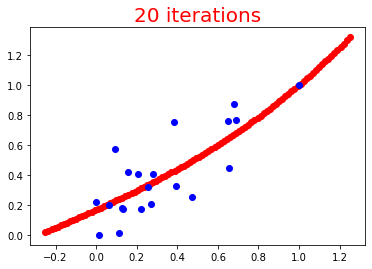

In [33]:
theta1 = theta1_history[19]
theta2 = theta2_history[19]
theta3 = theta3_history[19]
b = b_history[19]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("20 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

In [34]:
# ---------- Plot the errors over the training process ---------- #

theta1: 0.10991791659371411, theta2: 0.11291760098328256, theta3: 0.6171028666296231, b: 0.1683614844923378


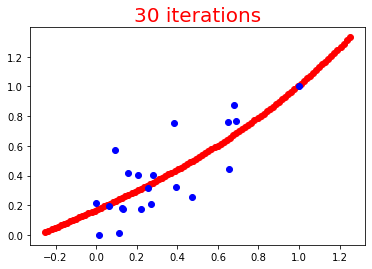

In [35]:
theta1 = theta1_history[29]
theta2 = theta2_history[29]
theta3 = theta3_history[29]
b = b_history[29]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("30 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.11148432318154734, theta2: 0.11498698252876514, theta3: 0.6194682147936064, b: 0.1674258221591437


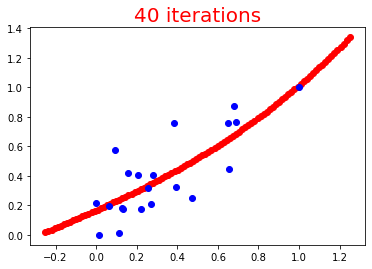

In [36]:
theta1 = theta1_history[39]
theta2 = theta2_history[39]
theta3 = theta3_history[39]
b = b_history[39]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("40 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

Text(0.5, 1.0, 'Errors over iterations')

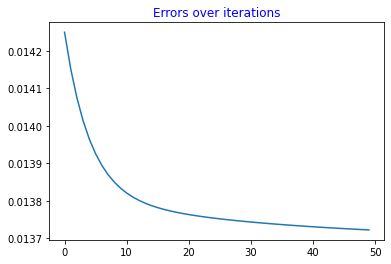

In [37]:
cost_x = list(range(len(cost_history)))
cost_y = cost_history
plt.plot(cost_x, cost_y)
plt.title("Errors over iterations", color = 'blue')